In [3]:
import hax
from decimal import*
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline
import numpy as np
from matplotlib.colors import LogNorm #for 2D plot color scale
import scipy.optimize as opt 
from scipy.stats import chisquare
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## PMT Only Based

In [18]:
#do not redo!!!!

#LOAD DATA FRAMES
na22_pmtonly_9mm = pd.read_pickle("./na22_pmtonly_190610_085915_9mm.pkl")
na22_pmtonly_5mm = pd.read_pickle("./na22_pmtonly_190610_131818_5mm.pkl")
na22_pmtonly_3mm = pd.read_pickle("./na22_pmtonly_190610_152511_3mm.pkl")

In [19]:
len(na22_pmtonly_9mm)

512

In [20]:
len(na22_pmtonly_5mm)

763

In [21]:
len(na22_pmtonly_3mm)

671

Separate Analysis

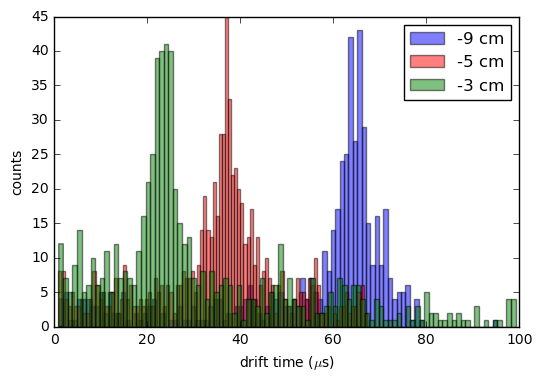

-9cm median time:  62.6609765625 +- 19.4954935612
-5cm median time:  36.7311035156 +- 14.5299897508
-3cm median time:  24.6944101563 +- 21.4312313334


In [31]:
plt.figure()
plt.hist(na22_pmtonly_9mm['t_drift'],label = '-9 cm',color = 'b', alpha = 0.5,bins = 100)
plt.hist(na22_pmtonly_5mm['t_drift'],label = '-5 cm',color = 'r', alpha = 0.5,bins = 100)
plt.hist(na22_pmtonly_3mm['t_drift'],label = '-3 cm',color = 'g', alpha = 0.5,bins = 100)
plt.xlabel('drift time ($\mu$s)')
plt.ylabel('counts')
plt.legend(loc = 1, prop={'size': 12})
plt.savefig('./na22_pmtonly_drifttime.pdf')
plt.show()

print('-9cm median time: ', np.median(na22_pmtonly_9mm['t_drift']), '+-', np.std(na22_pmtonly_9mm['t_drift']))
print('-5cm median time: ', np.median(na22_pmtonly_5mm['t_drift']), '+-', np.std(na22_pmtonly_5mm['t_drift']))
print('-3cm median time: ', np.median(na22_pmtonly_3mm['t_drift']), '+-', np.std(na22_pmtonly_3mm['t_drift']))

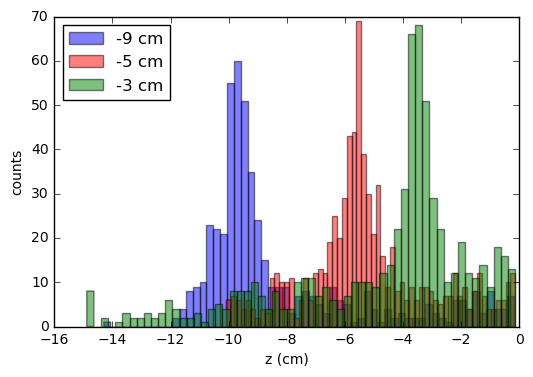

-9cm median time:  9.39914648438 +- 2.92432403418
-5cm median time:  5.50966552734 +- 2.17949846262
-3cm median time:  3.70416152344 +- 3.21468470001


In [34]:
plt.figure()
plt.hist(na22_pmtonly_9mm['zrec']*-1,label = '-9 cm',color = 'b', alpha = 0.5,bins = 60)
plt.hist(na22_pmtonly_5mm['zrec']*-1,label = '-5 cm',color = 'r', alpha = 0.5,bins = 60)
plt.hist(na22_pmtonly_3mm['zrec']*-1,label = '-3 cm',color = 'g', alpha = 0.5,bins = 60)
plt.xlabel('z (cm)')
plt.ylabel('counts')
plt.legend(loc = 2, prop={'size': 12})
plt.savefig('./na22_pmtonly_zrec.pdf')
plt.show()

print('-9cm median time: ', np.median(na22_pmtonly_9mm['zrec']), '+-', np.std(na22_pmtonly_9mm['zrec']))
print('-5cm median time: ', np.median(na22_pmtonly_5mm['zrec']), '+-', np.std(na22_pmtonly_5mm['zrec']))
print('-3cm median time: ', np.median(na22_pmtonly_3mm['zrec']), '+-', np.std(na22_pmtonly_3mm['zrec']))

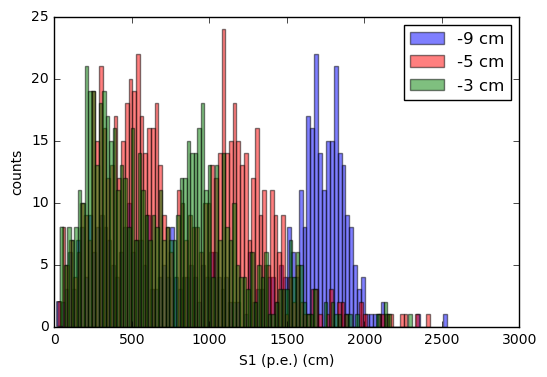

-9cm median time:  1354.91772461
-5cm median time:  723.920410156
-3cm median time:  663.073913574


In [45]:
plt.figure()
plt.hist(na22_pmtonly_9mm['s1_area'],label = '-9 cm',color = 'b', alpha = 0.5,bins = 100)
plt.hist(na22_pmtonly_5mm['s1_area'],label = '-5 cm',color = 'r', alpha = 0.5,bins = 100)
plt.hist(na22_pmtonly_3mm['s1_area'],label = '-3 cm',color = 'g', alpha = 0.5,bins = 100)
plt.xlabel('S1 (p.e.) (cm)')
plt.ylabel('counts')
plt.legend(loc = 1, prop={'size': 12})
plt.savefig('./na22_pmtonly_zrec.pdf')
plt.show()

print('-9cm median time: ', np.median(na22_pmtonly_9mm['s1_area']))
print('-5cm median time: ', np.median(na22_pmtonly_5mm['s1_area']))
print('-3cm median time: ', np.median(na22_pmtonly_3mm['s1_area']))

Combined Analysis

In [46]:
na22_pmtonly_combined = pd.concat([na22_pmtonly_9mm,na22_pmtonly_5mm,na22_pmtonly_3mm])

In [47]:
len(na22_pmtonly_combined)

1946

2D Histograms...

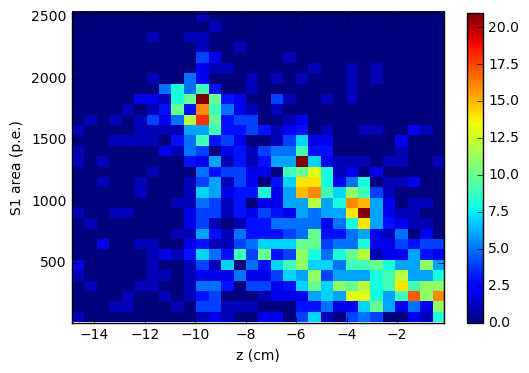

In [50]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_pmtonly_combined['zrec']*-1,na22_pmtonly_combined['s1_area'],
              bins = 30)#,norm = LogNorm())
plt.xlabel('z (cm)')
plt.ylabel('S1 area (p.e.)')
plt.colorbar(h[3], ax=ax)
# plt.savefig('./na22_s1area_zrec.pdf')
plt.show()

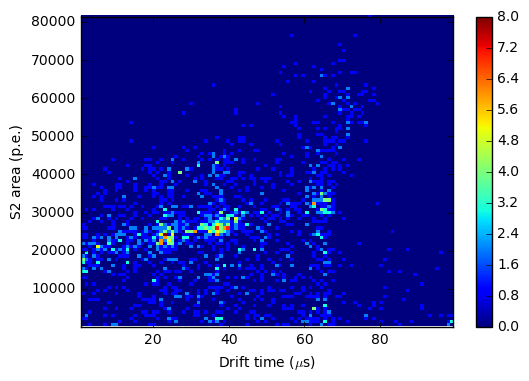

In [51]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_pmtonly_combined['t_drift'],na22_pmtonly_combined['s2_area'],bins = 100)
plt.xlabel('Drift time ($\mu$s)')
plt.ylabel('S2 area (p.e.)')
plt.colorbar(h[3], ax=ax)
# plt.savefig('./na22_s2area_tdrift.pdf')
plt.show()

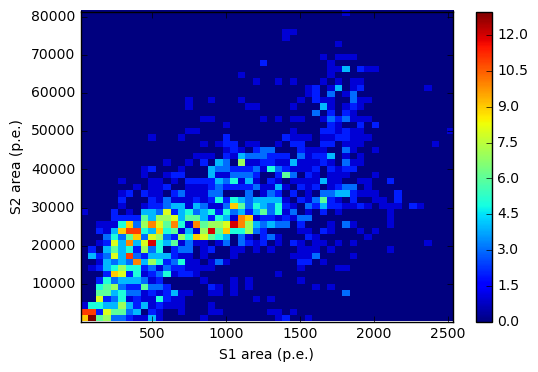

In [52]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_pmtonly_combined['s1_area'],na22_pmtonly_combined['s2_area'],bins = 50)
plt.xlabel('S1 area (p.e.)')
plt.ylabel('S2 area (p.e.)')
plt.colorbar(h[3], ax=ax)
# plt.savefig('./na22_s1area_s2area.pdf')
plt.show()

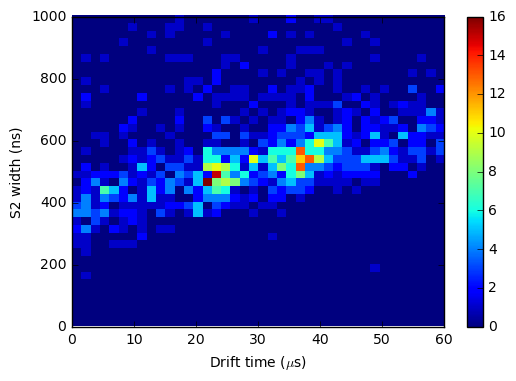

In [53]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_pmtonly_combined['t_drift'],na22_pmtonly_combined['s2_width'],range = ((0,60),(0,1000)),bins = 40)
plt.xlabel('Drift time ($\mu$s)')
plt.ylabel('S2 width (ns)')
plt.colorbar(h[3], ax=ax)
plt.savefig('./na22_s2width_tdrift.pdf')
plt.show()

## SiPM Cooincidence Based

In [15]:
#cylinder function

def data_for_cylinder_along_z(center_x,center_y,radius,height_low,height_high):
    z = np.linspace(height_low,height_high,1000)
    theta = np.linspace(0, 2*np.pi, 1000)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

In [16]:
#LOAD DATA FRAMES
xrec_3mm = pd.read_pickle("./na22_190610_152511_3mm_xrec.pkl")
yrec_3mm = pd.read_pickle("./na22_190610_152511_3mm_yrec.pkl")
zrec_3mm = pd.read_pickle("./na22_190610_152511_3mm_zrec.pkl")

xrec_5mm = pd.read_pickle("./na22_190610_131818_5mm_xrec.pkl")
yrec_5mm = pd.read_pickle("./na22_190610_131818_5mm_yrec.pkl")
zrec_5mm = pd.read_pickle("./na22_190610_131818_5mm_zrec.pkl")

xrec_9mm = pd.read_pickle("./na22_190610_085915_9mm_xrec.pkl")
yrec_9mm = pd.read_pickle("./na22_190610_085915_9mm_yrec.pkl")
zrec_9mm = pd.read_pickle("./na22_190610_085915_9mm_zrec.pkl")



In [17]:
len(xrec_3mm)

167

In [18]:
len(yrec_3mm)

167

In [19]:
len(zrec_3mm)

167

In [20]:
len(zrec_5mm)

191

In [21]:
len(zrec_9mm)

71

## New heading

Position Reconstruction 

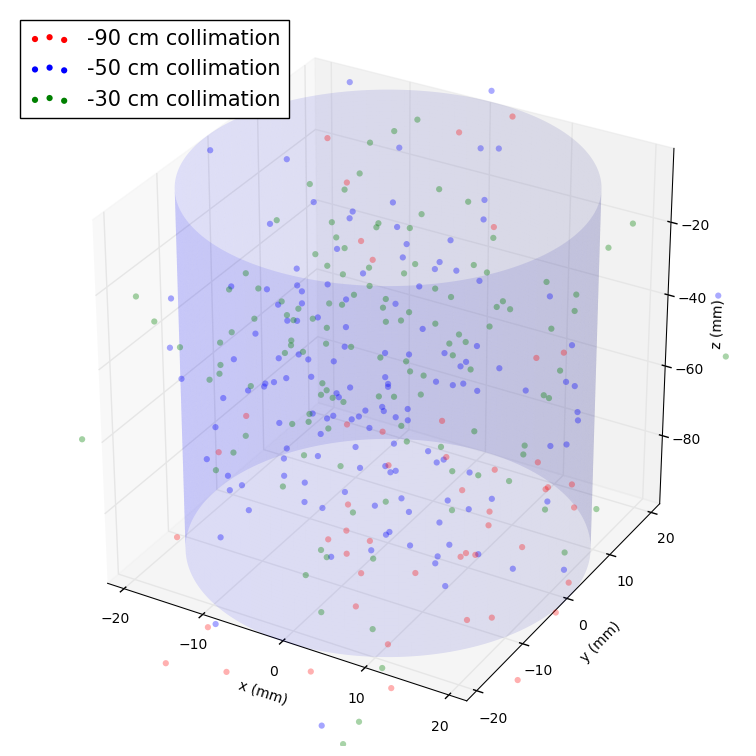

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #play with first argument?

drift_velocity = 1.58

# Scatter graph 9mm
X9 = xrec_9mm
Y9 = yrec_9mm
Z9 = zrec_9mm
ax.scatter(X9, Y9, Z9, c = 'red', edgecolors = 'none',s = 80,marker = '.',label = '-90 cm collimation')

# Scatter graph 5mm
X5 = xrec_5mm
Y5 = yrec_5mm
Z5 = zrec_5mm
ax.scatter(X5, Y5, Z5, c = 'blue', edgecolors = 'none',s = 80,marker = '.',label = '-50 cm collimation')

# Scatter graph 9mm
X3 = xrec_3mm
Y3 = yrec_3mm
Z3 = zrec_3mm
ax.scatter(X3, Y3, Z3, c = 'green', edgecolors = 'none',s = 80, marker = '.',label = '-30 cm collimation')

#cylinder
Xc,Yc,Zc = data_for_cylinder_along_z(0,0,22.15,-100,0)
ax.plot_surface(Xc, Yc, Zc, alpha=0.1,linewidth=0)

# Label each axis
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

# Set each axis limits
def get_fix_mins_maxs(mins, maxs):
    deltas = (maxs - mins) / 12.
    mins = mins + deltas / 4.
    maxs = maxs - deltas / 4.
    
    return [mins, maxs]

x_minmax = get_fix_mins_maxs(-22.15, 22.15)
y_minmax = get_fix_mins_maxs(-22.15, 22.15)
z_minmax = get_fix_mins_maxs(-100,0)

ax.set_xlim(x_minmax)
ax.set_ylim(y_minmax) 
ax.set_zlim(z_minmax) 

# Equally stretch all axes
ax.set_aspect("equal")

plt.gcf().set_size_inches(10,9.5) 

plt.legend(loc = 2, prop={'size': 15},numpoints = 1)
fig.savefig('./3D_posrec.pdf')
plt.show()


In [23]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d') #play with first argument?

# drift_velocity = 1.58

# # Scatter graph 9mm
# X9 = na22_9mm['xrec']
# Y9 = na22_9mm['yrec']
# Z9 = na22_9mm['zrec']*-10
# ax.scatter(X9, Y9, Z9, c = 'red', edgecolors = 'none',marker = '.',label = '-9 mm')

# # Scatter graph 5mm
# X5 = na22_5mm['xrec']
# Y5 = na22_5mm['yrec']
# Z5 = na22_5mm['zrec']*-10
# ax.scatter(X5, Y5, Z5, c = 'blue', edgecolors = 'none',marker = '.',label = '-5 mm')

# # Scatter graph 9mm
# X3 = na22_3mm['xrec']
# Y3 = na22_3mm['yrec']
# Z3 = na22_3mm['zrec']*-10
# ax.scatter(X3, Y3, Z3, c = 'green', edgecolors = 'none',marker = '.',label = '-3 mm')

# #cylinder
# Xc,Yc,Zc = data_for_cylinder_along_z(0,0,22.15,-100,0)
# ax.plot_surface(Xc, Yc, Zc, alpha=0.1,linewidth=0)

# # #disk at -9mm
# # Xc9,Yc9,Zc9 = data_for_cylinder_along_z(0,0,22.15,-91,-89)
# # ax.plot_surface(Xc9, Yc9, Zc9, alpha=0.5,color = 'red')

# # #disk at -5mm
# # Xc5,Yc5,Zc5 = data_for_cylinder_along_z(0,0,22.15,-51,-49)
# # ax.plot_surface(Xc5, Yc5, Zc5, alpha=0.5,color = 'blue')

# # #disk at -3mm
# # Xc3,Yc3,Zc3 = data_for_cylinder_along_z(0,0,22.15,-31,-29)
# # ax.plot_surface(Xc3, Yc3, Zc3, alpha=0.5,color = 'green')

# # Label each axis
# ax.set_xlabel('x (mm)')
# ax.set_ylabel('y (mm)')
# ax.set_zlabel('z (mm)')

# # Set each axis limits
# def get_fix_mins_maxs(mins, maxs):
#     deltas = (maxs - mins) / 12.
#     mins = mins + deltas / 4.
#     maxs = maxs - deltas / 4.
    
#     return [mins, maxs]

# x_minmax = get_fix_mins_maxs(-22.15, 22.15)
# y_minmax = get_fix_mins_maxs(-22.15, 22.15)
# z_minmax = get_fix_mins_maxs(-100,0)

# ax.set_xlim(x_minmax)
# ax.set_ylim(y_minmax) 
# ax.set_zlim(z_minmax) 

# # Equally stretch all axes
# ax.set_aspect("equal")

# plt.gcf().set_size_inches(10,9.5) 

# plt.legend(loc = 2, prop={'size': 15},numpoints = 1)
# # fig.savefig('./3D_posrec.pdf')
# plt.show()


CUTS ON HIGHT DISTRIBUTION

In [24]:
z9_med = np.median(Z9)
z5_med = np.median(Z5)
z3_med = np.median(Z3)

In [25]:
z9_med

-87.016069335937502

In [27]:
z5_med

-56.017579101562504

In [28]:
z3_med

-38.620163085937492

In [85]:
#9mm cute
Z9MED=[]
X9MED=[]
Y9MED=[]
for i in range(len(Z9)):
    if np.abs(Z9[i] - z9_med) < 5:
        if np.sqrt(X9[i]**2 + Y9[i]**2) < 22:
            Z9MED.append(Z9[i])
            X9MED.append(X9[i])
            Y9MED.append(Y9[i])

In [86]:
#5mm cute
Z5MED=[]
X5MED=[]
Y5MED=[]
for i in range(len(Z5)):
    if np.abs(Z5[i] - z5_med) < 5:
        if np.sqrt(X5[i]**2 + Y5[i]**2) < 22:
            Z5MED.append(Z5[i])
            X5MED.append(X5[i])
            Y5MED.append(Y5[i])

In [87]:
#3mm cute
Z3MED=[]
X3MED=[]
Y3MED=[]
for i in range(len(Z3)):
    if np.abs(Z3[i] - z3_med) < 5:
        if np.sqrt(X3[i]**2 + Y3[i]**2) < 22:
            Z3MED.append(Z3[i])
            X3MED.append(X3[i])
            Y3MED.append(Y3[i])

In [92]:
len(Z9MED)

7

In [91]:
len(Z5MED)

36

In [90]:
len(Z3MED)

33

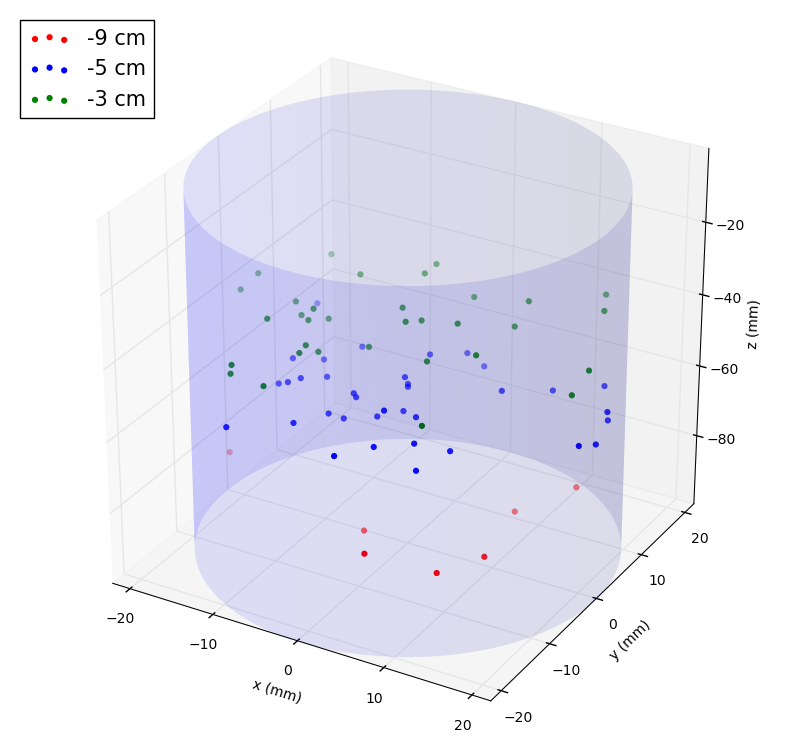

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #play with first argument?

drift_velocity = 1.58

# Scatter graph 9mm
ax.scatter(X9MED, Y9MED, Z9MED, s=80, c = 'red', edgecolors = 'none',marker = '.',label = '-9 cm')

# Scatter graph 5mm
ax.scatter(X5MED, Y5MED, Z5MED, s=80,c = 'blue', edgecolors = 'none',marker = '.',label = '-5 cm')

# Scatter graph 9mm
ax.scatter(X3MED, Y3MED, Z3MED,s=80, c = 'green', edgecolors = 'none',marker = '.',label = '-3 cm')

#cylinder
Xc,Yc,Zc = data_for_cylinder_along_z(0,0,22.15,-100,0)
ax.plot_surface(Xc, Yc, Zc, alpha=0.1,linewidth=0)

# #disk at -9mm
# Xc9,Yc9,Zc9 = data_for_cylinder_along_z(0,0,22.15,-91,-89)
# ax.plot_surface(Xc9, Yc9, Zc9, alpha=0.5,color = 'red')

# #disk at -5mm
# Xc5,Yc5,Zc5 = data_for_cylinder_along_z(0,0,22.15,-51,-49)
# ax.plot_surface(Xc5, Yc5, Zc5, alpha=0.5,color = 'blue')

# #disk at -3mm
# Xc3,Yc3,Zc3 = data_for_cylinder_along_z(0,0,22.15,-31,-29)
# ax.plot_surface(Xc3, Yc3, Zc3, alpha=0.5,color = 'green')

# Label each axis
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

# Set each axis limits
def get_fix_mins_maxs(mins, maxs):
    deltas = (maxs - mins) / 12.
    mins = mins + deltas / 4.
    maxs = maxs - deltas / 4.
    
    return [mins, maxs]

x_minmax = get_fix_mins_maxs(-22.15, 22.15)
y_minmax = get_fix_mins_maxs(-22.15, 22.15)
z_minmax = get_fix_mins_maxs(-100,0)

ax.set_xlim(x_minmax)
ax.set_ylim(y_minmax) 
ax.set_zlim(z_minmax) 

# Equally stretch all axes
# ax.set_aspect("equal")

plt.gcf().set_size_inches(10,9.5) 

plt.legend(loc = 2, prop={'size': 15},numpoints = 1)
fig.savefig('./3D_posrec_limited.pdf')
plt.show()

In [ ]:
def data_for_cylinder_along_z(center_x,center_y,radius,height_low,height_high):
    z = np.linspace(height_low,height_high,1000)
    theta = np.linspace(0, 2*np.pi, 1000)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

Combined Analysis

In [4]:
na22_combined = pd.concat([na22_9mm,na22_5mm,na22_3mm])

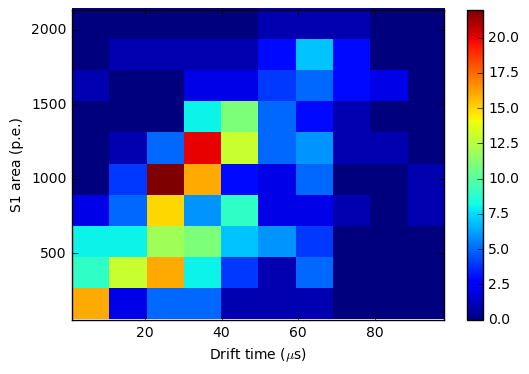

In [14]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_combined['t_drift'],na22_combined['s1_area'],bins = 10)
plt.xlabel('Drift time ($\mu$s)')
plt.ylabel('S1 area (p.e.)')
plt.colorbar(h[3], ax=ax)
plt.show()

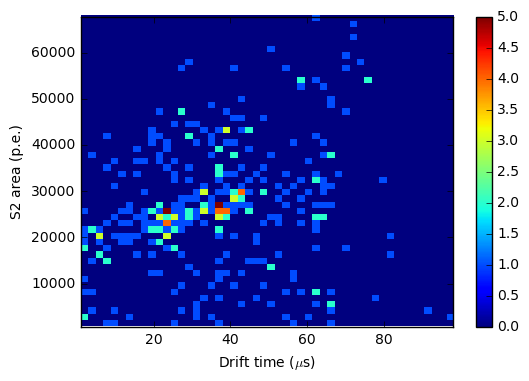

In [16]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_combined['t_drift'],na22_combined['s2_area'],bins = 50)
plt.xlabel('Drift time ($\mu$s)')
plt.ylabel('S2 area (p.e.)')
plt.colorbar(h[3], ax=ax)
plt.show()

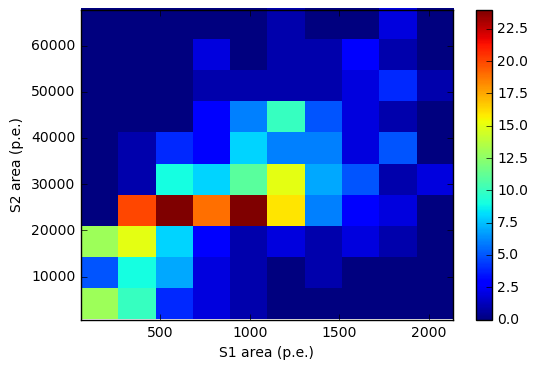

In [18]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_combined['s1_area'],na22_combined['s2_area'],bins = 10)
plt.xlabel('S1 area (p.e.)')
plt.ylabel('S2 area (p.e.)')
plt.colorbar(h[3], ax=ax)
plt.show()

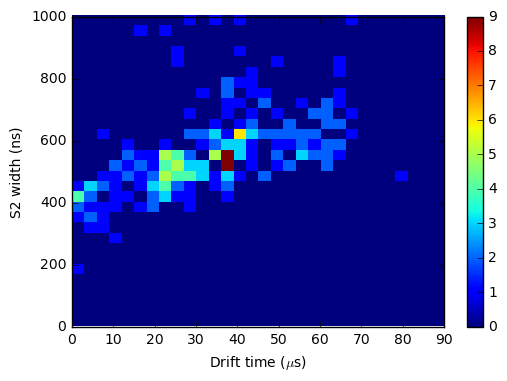

In [28]:
fig, ax = plt.subplots()
h = ax.hist2d(na22_combined['t_drift'],na22_combined['s2_width'],range = ((0,90),(0,1000)),bins = 30)
plt.xlabel('Drift time ($\mu$s)')
plt.ylabel('S2 width (ns)')
plt.colorbar(h[3], ax=ax)
plt.show()